<a href="https://colab.research.google.com/github/Desperados113/Capstone-Projetc/blob/master/Capstone_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Introduction

## A.1 Discussion of the background
#### Quebec, the Canadian province, is receiving yearly more than 40 000 new residents, and more than 70% of them (approximately 28 000) choose to stay in Montreal region.

#### The main reason for these immigrants is that Montreal, as a big and multicultural city, is considered a very good starting point, especially for people who don't know yet where the want to settle permanently.

#### One of the biggest preoccupations for the new immigrants is to minimize their spending while finding a job during their first 2-3 months, specially, the rent and the transportation bills. Any apartment with a lower cost of rent isn’t the ideal solution, but there must be a compromise between the rent and the proximity of the services related to the chosen apartment.

#### Depending on their budgets, their profiles (individual, couple or family), thus, their needs, deciding on the installation area could easily become a headache for the new immigrants, and the objective of this project is to help them decide in which neighborhood of Montreal they should settle in, according to their budget for the rent and the services they need to be close to them.

## A.2 Data description

#### To help giving a solution to the problem, below the data we will be using:
    - Rental price by borough of Montreal city, found at the Open-Data Portal of the city of Montreal (official reference in French) 
    - Geolocation of the boroughs of the city of Montreal, found at the Open-Data Portal of the Quebec government
    - Foursquare to get the most common venues of given boroughs of Montreal

# B. Methodology

First, i gathered the information about the average rent cost for each borough in Montreal city, the data is available in a text format on the Montreal city portail, so i casted them into a dataframe to make them easier for use and manipulation :

In [1]:
import pandas as pd
# initialize the list of Montreal boroughs 
Boroughs=['Ahuntsic-Cartierville','Anjou','Côte-des-Neiges-Notre-Dame-de-Grâce','Lachine','LaSalle','Le Plateau-Mont-Royal','Le Sud-Ouest', \
          'L\'Île-Bizard-Sainte-Geneviève','Mercier-Hochelaga-Maisonneuve','Montréal-Nord','Outremont','Pierrefonds-Roxboro','Rivière-des-Prairies-Pointe-aux-Trembles', \
          'Rosemont-La Petite-Patrie','Saint-Laurent','Saint-Léonard','Verdun','Ville-Marie','Villeray-Saint-Michel-Parc-Extension','Baie-D\'Urfé', 'Beaconsfield', \
          'Côte-Saint-Luc','Dollard-Des-Ormeaux','Dorval','Hampstead','Kirkland','Montréal-Est','Montréal-Ouest','Mont-Royal','Pointe-Claire','Sainte-Anne-de-Bellevue', \
          'Senneville','Westmount','L\'Île-Dorval']

# initialize the list of rental coasts corresponding t each borough
rent=[715,774,795,715,786,885,729,788,721,714,1186,808,733,734,859,804,809,898,708,1120,1249,961,909,804,914,1093,711,971,1003,1103,849,900,1312,926]

#create the DataFrame of Montreal average rental cost
df_mtl=pd.DataFrame(list(zip(Boroughs,rent)), columns=['Borough','Average_rental_cost'])
df_mtl

,Borough,Average_rental_cost
0,Ahuntsic-Cartierville,715
1,Anjou,774
2,Côte-des-Neiges-Notre-Dame-de-Grâce,795
3,Lachine,715
4,LaSalle,786
5,Le Plateau-Mont-Royal,885
6,Le Sud-Ouest,729
7,L'Île-Bizard-Sainte-Geneviève,788
8,Mercier-Hochelaga-Maisonneuve,721
9,Montréal-Nord,714


In [2]:
#Downloading the 
#!wget --quiet http://donnees.ville.montreal.qc.ca/dataset/00bd85eb-23aa-4669-8f1b-ba9a000e3dd8/resource/e9b0f927-8f75-458c-8fda-b5da65cc8b73/download/limadmin.json -O limadmin.json
    
#print('GeoJSON file downloaded!')

In [3]:
#Installing the library used for geografical visualisation
!pip install folium

Let's get the latitude an longitude of each neighborhood of Montreal an adding them to our dataset

In [4]:
#Getting latitude an longitude of each neighborhood of Montreal
from geopy.geocoders import Nominatim

for Borough in df_mtl['Borough']:
    
    #getting the langitude and latitude of the borough
    address = '{},Montreal, Quebec, CA'.format(Borough)
    geolocator = Nominatim(user_agent="Montreal_city")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude

    #Adding latitude and longitude of the neighborhood to the dataframe df_mtl
    df_mtl.loc[df_mtl['Borough'] == Borough, 'latitude']=latitude
    df_mtl.loc[df_mtl['Borough'] == Borough, 'longitude']=longitude

df_mtl
    
    

,Borough,Average_rental_cost,latitude,longitude
0,Ahuntsic-Cartierville,715,45.541892,-73.680319
1,Anjou,774,45.604898,-73.546672
2,Côte-des-Neiges-Notre-Dame-de-Grâce,795,45.483609,-73.626970
3,Lachine,715,45.448676,-73.711204
4,LaSalle,786,45.432514,-73.629267
5,Le Plateau-Mont-Royal,885,45.521836,-73.582173
6,Le Sud-Ouest,729,45.467991,-73.588561
7,L'Île-Bizard-Sainte-Geneviève,788,45.495042,-73.903445
8,Mercier-Hochelaga-Maisonneuve,721,45.574099,-73.525838
9,Montréal-Nord,714,45.593899,-73.637606


Let's give an overview of all the boroughs in Montreal and their average rental cost

In [5]:
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-_jmxwft1
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-_jmxwft1
  Created wheel for folium: filename=folium-0.11.0+19.g46f820e-py2.py3-none-any.whl size=97533 sha256=d97b7740c25aed02ee31737c644ccc637ad2010c4a4f9cc3fc0d781b18256ff6
  Stored in directory: /tmp/pip-ephem-wheel-cache-3ceqhwwx/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.11.0+19.g46f820e which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [6]:
from geopy.geocoders import Nominatim
import folium # map rendering library
import json
import requests

#getting the langitude and latitude of Montreal
address = 'Montreal, Quebec, CA'
geolocator = Nominatim(user_agent="Montreal_city")
location = geolocator.geocode(address)
latitude_mtl = location.latitude
longitude_mtl = location.longitude
    
mtl_map=folium.Map(
        location=[latitude_mtl, longitude_mtl],
        zoom_start=11)

#Add a rental cost marker to each borough

rental_cost_group=folium.map.FeatureGroup()

for Borough in df_mtl['Borough']:
    
    #addind a marker to each borough regarding to its location

    rental_cost_group.add_child(
        folium.Marker(
            location=[df_mtl.loc[df_mtl['Borough'] == Borough, 'latitude'],df_mtl.loc[df_mtl['Borough'] == Borough, 'longitude']], \
                                 tooltip= '{}:{} $'.format(Borough, df_mtl.loc[df_mtl['Borough'] == Borough, 'Average_rental_cost'].iloc[0])))

mtl_map.add_child(rental_cost_group)

#zoning of the boroughs in Montreal city
#Downloading the JSON file of Montreal from the portail of the city
url = 'http://donnees.ville.montreal.qc.ca/dataset/00bd85eb-23aa-4669-8f1b-ba9a000e3dd8/resource/e9b0f927-8f75-458c-8fda-b5da65cc8b73/download'
us_states = f'{url}//limadmin.json'

geo_json_data = json.loads(requests.get(us_states).text)

folium.GeoJson(geo_json_data).add_to(mtl_map)

mtl_map


Now, we can start our exploration of the neighborhoods of Montreal using Foursquare

In [7]:
#Defining Foursquare Credentials

CLIENT_ID = 'WCO3PQS02C5V3FHVMAGTI5N2TNM5UBSKGZYQYRLOPEAGESXB' # your Foursquare ID
CLIENT_SECRET = 'MHHHHT2OT5TZFBMRVV4QK3NBX51RGSEKJTWLWBMNNX1LWYV4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Lets' define the function that will help us getting the main venues within a given borough, that we can apply to all of the boroughs \
In summary, this fuction execute the followinf tasks : 

1 - Create the url used to push the venues request to the Foursquare API \
(We choosed to limit results to the **first 100 venues** within a **radius of 1000 meters**) \ \

2 - Getting the request results \
3 - Cast the results into a dataframe to make the data manipulation easier

In [8]:
# limit of number of venues returned by Foursquare API
LIMIT = 100

# define radius
radius = 1000

#Define the function that insure the folowing tasks :
    #1 - Create the url used to push the venues request to the Foursquare API (We choosed to limit results to the first 25 venues within a radius of 500 meters) 
    #2 - Getting the request results
    #3 - Cast the results into a dataframe to make the data manipulation easier

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
Montreal_venues = getNearbyVenues(names=df_mtl['Borough'],
                                   latitudes=df_mtl['latitude'],
                                   longitudes=df_mtl['longitude']
                                  )
Montreal_venues

Ahuntsic-Cartierville
Anjou
Côte-des-Neiges-Notre-Dame-de-Grâce
Lachine
LaSalle
Le Plateau-Mont-Royal
Le Sud-Ouest
L'Île-Bizard-Sainte-Geneviève
Mercier-Hochelaga-Maisonneuve
Montréal-Nord
Outremont
Pierrefonds-Roxboro
Rivière-des-Prairies-Pointe-aux-Trembles
Rosemont-La Petite-Patrie
Saint-Laurent
Saint-Léonard
Verdun
Ville-Marie
Villeray-Saint-Michel-Parc-Extension
Baie-D'Urfé
Beaconsfield
Côte-Saint-Luc
Dollard-Des-Ormeaux
Dorval
Hampstead
Kirkland
Montréal-Est
Montréal-Ouest
Mont-Royal
Pointe-Claire
Sainte-Anne-de-Bellevue
Senneville
Westmount
L'Île-Dorval


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ahuntsic-Cartierville,45.541892,-73.680319,Sapori Di Napoli,45.540799,-73.685707,Italian Restaurant
1,Ahuntsic-Cartierville,45.541892,-73.680319,Parc Marcelin-Wilson,45.540585,-73.685730,Park
2,Ahuntsic-Cartierville,45.541892,-73.680319,Subway,45.537975,-73.679188,Sandwich Place
3,Ahuntsic-Cartierville,45.541892,-73.680319,AMT Gare de Bois-de-Boulogne,45.540292,-73.676976,Train Station
4,Ahuntsic-Cartierville,45.541892,-73.680319,Aréna Marcellin-Wilson,45.540662,-73.685701,Hockey Arena
...,...,...,...,...,...,...,...
379,Westmount,45.485733,-73.596395,Second Cup,45.487687,-73.591431,Coffee Shop
380,Westmount,45.485733,-73.596395,Chez Nick,45.487747,-73.591393,Café
381,Westmount,45.485733,-73.596395,Vago,45.487357,-73.590670,Italian Restaurant
382,Westmount,45.485733,-73.596395,Tony Shoes,45.487404,-73.590879,Shoe Store


Now, lest's join all the findings to our primary table represeting Montreal boroughs

In [10]:
#Merge the Montreal_venues dataframe with the df_mtl

df_mtl_venues_global=pd.merge(df_mtl, Montreal_venues, left_on='Borough', right_on='Neighborhood')
#Dropping [Neighborhood], [Neighborhood Latitude] and [Neighborhood Longitude] columns to avoid duplicating information on the table
df_mtl_venues_global.drop(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude' ], axis=1, inplace=True)
df_mtl_venues_global.rename(columns={"Venue Category": "Venue_Category"}, inplace=True)
df_mtl_venues_global

,Borough,Average_rental_cost,latitude,longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
0,Ahuntsic-Cartierville,715,45.541892,-73.680319,Sapori Di Napoli,45.540799,-73.685707,Italian Restaurant
1,Ahuntsic-Cartierville,715,45.541892,-73.680319,Parc Marcelin-Wilson,45.540585,-73.685730,Park
2,Ahuntsic-Cartierville,715,45.541892,-73.680319,Subway,45.537975,-73.679188,Sandwich Place
3,Ahuntsic-Cartierville,715,45.541892,-73.680319,AMT Gare de Bois-de-Boulogne,45.540292,-73.676976,Train Station
4,Ahuntsic-Cartierville,715,45.541892,-73.680319,Aréna Marcellin-Wilson,45.540662,-73.685701,Hockey Arena
...,...,...,...,...,...,...,...,...
379,Westmount,1312,45.485733,-73.596395,Second Cup,45.487687,-73.591431,Coffee Shop
380,Westmount,1312,45.485733,-73.596395,Chez Nick,45.487747,-73.591393,Café
381,Westmount,1312,45.485733,-73.596395,Vago,45.487357,-73.590670,Italian Restaurant
382,Westmount,1312,45.485733,-73.596395,Tony Shoes,45.487404,-73.590879,Shoe Store


Regarding to our specifications (100 venues wthinin a radius of 1000 metres for each bourough), we get a total of venues of :

In [11]:
df_mtl_venues_global.Venue.count()

384

Regarding to our specifications (100 venues wthinin a radius of 1000 metres for each bourough), we get a total of unique venues categories of :

In [12]:
df_mtl_venues_global.Venue_Category.nunique()

131

- Data about the venues counting per borough

In [13]:
#Getting the number of venues within each borough
df_mtl_venues=pd.DataFrame(df_mtl_venues_global.groupby('Borough').Venue.count())

#Converting the index into a column
df_mtl_venues.reset_index(inplace=True)
df_mtl_venues = df_mtl_venues.rename(columns = {'index':'Borough', 'Venue':'Total_Venues'})

#Merge the Total_Venues column data to the dataframe df_mtl
df_mtl=pd.merge(df_mtl,df_mtl_venues, left_on='Borough', right_on='Borough')
df_mtl

,Borough,Average_rental_cost,latitude,longitude,Total_Venues
0,Ahuntsic-Cartierville,715,45.541892,-73.680319,8
1,Anjou,774,45.604898,-73.546672,3
2,Côte-des-Neiges-Notre-Dame-de-Grâce,795,45.483609,-73.626970,32
3,Lachine,715,45.448676,-73.711204,4
4,LaSalle,786,45.432514,-73.629267,29
5,Le Plateau-Mont-Royal,885,45.521836,-73.582173,93
6,Le Sud-Ouest,729,45.467991,-73.588561,10
7,L'Île-Bizard-Sainte-Geneviève,788,45.495042,-73.903445,1
8,Mercier-Hochelaga-Maisonneuve,721,45.574099,-73.525838,1
9,Montréal-Nord,714,45.593899,-73.637606,4


- Data about the Venue_Category counting per borough

In [14]:
df_unique_categories_per_borough=pd.DataFrame(df_mtl_venues_global.groupby('Borough').Venue_Category.unique())

#Converting the index into a column
df_unique_categories_per_borough.reset_index(inplace=True)
df_unique_categories_per_borough = df_unique_categories_per_borough.rename(columns = {'index':'Borough'})

#df_unique_categories_per_borough['Venue_Category_Count']
for borough in df_unique_categories_per_borough['Borough']:
    df_unique_categories_per_borough.loc[df_unique_categories_per_borough['Borough']==borough, 'Venue_Category_Count']= \
    len(df_mtl_venues_global.loc[df_mtl_venues_global['Borough']==borough, 'Venue_Category'].unique())

df_unique_categories_per_borough.drop(['Venue_Category'], inplace=True, axis=1)

#Merge the Total_Venues column data to the dataframe df_mtl
df_mtl=pd.merge(df_mtl,df_unique_categories_per_borough, left_on='Borough', right_on='Borough')
df_mtl



,Borough,Average_rental_cost,latitude,longitude,Total_Venues,Venue_Category_Count
0,Ahuntsic-Cartierville,715,45.541892,-73.680319,8,8.0
1,Anjou,774,45.604898,-73.546672,3,3.0
2,Côte-des-Neiges-Notre-Dame-de-Grâce,795,45.483609,-73.626970,32,26.0
3,Lachine,715,45.448676,-73.711204,4,4.0
4,LaSalle,786,45.432514,-73.629267,29,21.0
5,Le Plateau-Mont-Royal,885,45.521836,-73.582173,93,49.0
6,Le Sud-Ouest,729,45.467991,-73.588561,10,9.0
7,L'Île-Bizard-Sainte-Geneviève,788,45.495042,-73.903445,1,1.0
8,Mercier-Hochelaga-Maisonneuve,721,45.574099,-73.525838,1,1.0
9,Montréal-Nord,714,45.593899,-73.637606,4,4.0


For a good representation and an easy reading of th table, let's set the "Borough" column as the index of the dataframe

In [15]:
df_mtl.set_index('Borough', inplace=True)
df_mtl

,Average_rental_cost,latitude,longitude,Total_Venues,Venue_Category_Count
Borough,,,,,
Ahuntsic-Cartierville,715,45.541892,-73.680319,8,8.0
Anjou,774,45.604898,-73.546672,3,3.0
Côte-des-Neiges-Notre-Dame-de-Grâce,795,45.483609,-73.626970,32,26.0
Lachine,715,45.448676,-73.711204,4,4.0
LaSalle,786,45.432514,-73.629267,29,21.0
Le Plateau-Mont-Royal,885,45.521836,-73.582173,93,49.0
Le Sud-Ouest,729,45.467991,-73.588561,10,9.0
L'Île-Bizard-Sainte-Geneviève,788,45.495042,-73.903445,1,1.0
Mercier-Hochelaga-Maisonneuve,721,45.574099,-73.525838,1,1.0


The graphic below shows that the top 5 boroughs with the highest rental cost are :

- Westmount
- Beaconsfield
- Outremont
- Baie-D'Urfé
- Pointe-Claire

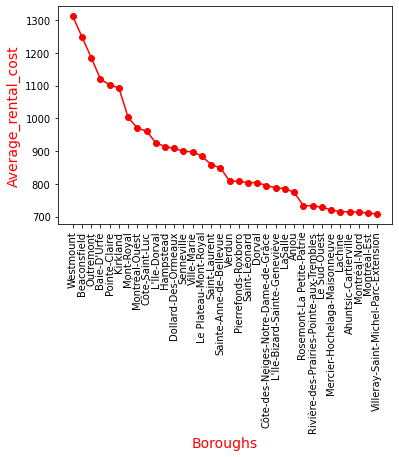

In [16]:
import matplotlib.pyplot as plt
#df_mtl.Average_rental_cost.sort_values(ascending=False).plot(kind='bar', figsize=(15,8))

### plotting the Average_rental_cost ###

# create figure and axis objects with subplots()
fig,ax1 = plt.subplots()
plt.xticks(rotation=90)
ax1.plot(df_mtl.Average_rental_cost.sort_values(ascending=False).index, df_mtl.Average_rental_cost.sort_values(ascending=False), color="red", marker="o")
# set x-axis label
ax1.set_xlabel("Boroughs",color='red', fontsize=14)
# set y-axis label
ax1.set_ylabel("Average_rental_cost",color="red",fontsize=14)
plt.show()

The top 5 boroughs encompassing a higher number of venues (whatever the categories of the venues) are :
- Le Plateau-Mont-Royal
- Côte-des-Neiges-Notre-Dame-de-Grâce
- LaSalle
- Verdun
- Villeray-Saint-Michel-Parc-Extension

In [17]:
df_mtl.Total_Venues.sort_values(ascending=False).index

Index(['Le Plateau-Mont-Royal', 'Côte-des-Neiges-Notre-Dame-de-Grâce',
       'LaSalle', 'Verdun', 'Villeray-Saint-Michel-Parc-Extension',
       'Outremont', 'Dorval', 'Dollard-Des-Ormeaux', 'Le Sud-Ouest',
       'Montréal-Ouest', 'Kirkland', 'Ville-Marie', 'Côte-Saint-Luc',
       'Ahuntsic-Cartierville', 'Saint-Laurent', 'Montréal-Est', 'Westmount',
       'Baie-D'Urfé', 'Lachine', 'Pointe-Claire', 'Mont-Royal', 'Beaconsfield',
       'Montréal-Nord', 'Pierrefonds-Roxboro', 'Rosemont-La Petite-Patrie',
       'Saint-Léonard', 'Hampstead', 'Anjou',
       'Rivière-des-Prairies-Pointe-aux-Trembles', 'Sainte-Anne-de-Bellevue',
       'Senneville', 'Mercier-Hochelaga-Maisonneuve',
       'L'Île-Bizard-Sainte-Geneviève', 'L'Île-Dorval'],
      dtype='object', name='Borough')

Text(0, 0.5, 'Total Venues within the borough')

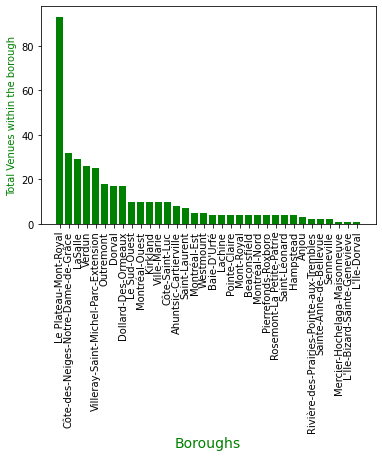

In [18]:
### plotting the Total_venues per borough ###

# create figure and axis objects with subplots()
fig, ax3 = plt.subplots()
plt.xticks(rotation=90)
ax3.bar(df_mtl.Total_Venues.sort_values(ascending=False).index, df_mtl.Total_Venues.sort_values(ascending=False), color="green")

# set x-axis label
ax3.set_xlabel("Boroughs",color='green', fontsize=14)

# set y-axis label
ax3.set_ylabel("Total Venues within the borough",color="green",fontsize=10)

In terms of variety of venues categories, the top 5 boroughs are :

- Le Plateau-Mont-Royal
- Côte-des-Neiges-Notre-Dame-de-Grâce
- Verdun
- LaSalle
- Villeray-Saint-Michel-Parc-Extension

Which are exactly the same boroughs with higher numbers of venues

Text(0, 0.5, 'Venues categories within the borough')

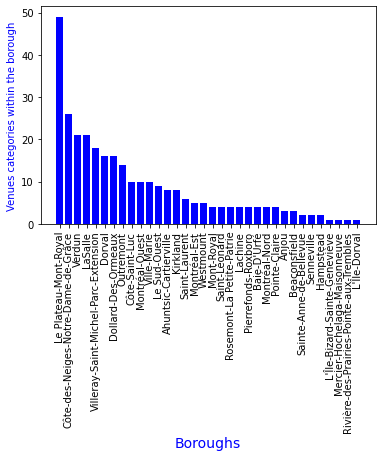

In [19]:
### plotting the Venue_Category_Count ###

# create figure and axis objects with subplots()
fig, ax2 = plt.subplots()
plt.xticks(rotation=90)
ax2.bar(df_mtl.Venue_Category_Count.sort_values(ascending=False).index, df_mtl.Venue_Category_Count.sort_values(ascending=False), color="blue")

# set x-axis label
ax2.set_xlabel("Boroughs",color='blue', fontsize=14)

# set y-axis label
ax2.set_ylabel("Venues categories within the borough",color="blue",fontsize=10)



### Let's plot the two informations in the same graphic and see how the boroughs compare

Text(0, 0.5, 'Venues categories within the borough')

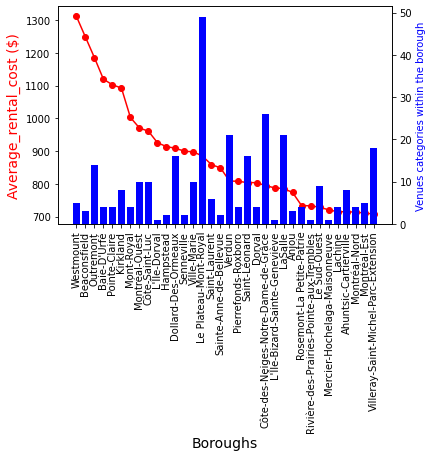

In [20]:

### plotting the Average_rental_cost ###

# create figure and axis objects with subplots()
fig,ax1 = plt.subplots()
plt.xticks(rotation=90)
ax1.plot(df_mtl.Average_rental_cost.sort_values(ascending=False).index, df_mtl.Average_rental_cost.sort_values(ascending=False), color="red", marker="o")
# set x-axis label
ax1.set_xlabel("Boroughs", fontsize=14)
# set y-axis label
ax1.set_ylabel("Average_rental_cost ($)",color="red",fontsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.bar(df_mtl.Average_rental_cost.sort_values(ascending=False).index, df_mtl.sort_values(ascending=False, by=['Average_rental_cost']).Venue_Category_Count, color='blue')
ax2.set_ylabel("Venues categories within the borough", color="blue",fontsize=10)

#### From the graphic, we can see that most of boroughs having a high number of venues are roughly in the middle of the range of the rental cost

To more help immigrants planing to settle in Montreal, a globl comparaison of the boroughs sould be done, based on their average rental cost and the information about the venues they encompass. Therfore, clustreing the boroughs based on these data is a good avenue.  \
For this purpose, we will be applying the k-means algorithm, as it's a clustring algorithm that will help us group boroughs in different clusters so we can define how similar boroughs are, according to the cluster they belong to.

In [21]:
##Create the data frame X that will be used in  the ML modeling##

#Create a copy of the df_mtl
data=df_mtl.copy()
data.reset_index(inplace=True)
data = data.rename(columns = {'index':'Borough'})
data

#Select the variables w'll be using for K-Means ML  
X=data.iloc[:, [1,5]]
X.head()

,Average_rental_cost,Venue_Category_Count
0,715,8.0
1,774,3.0
2,795,26.0
3,715,4.0
4,786,21.0


Using the elbow method to find the optimal number of clusters K

Text(0, 0.5, 'WCSS')

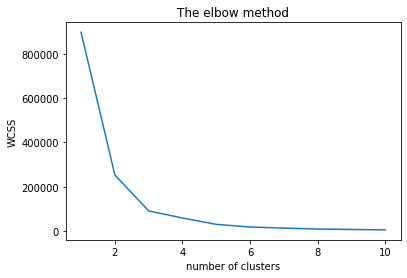

In [22]:
from sklearn.cluster import KMeans 
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=7)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

From the graphic, we conclude that the optimal value for K is **5**

In [23]:
#Create a KMeans object
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=7)

#Get the cluster for each row of X (i.e for each borough)
y_kmeans=kmeans.fit_predict(X)

#Add the Cluster column to the dataframe X
X['Cluster']=y_kmeans
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Average_rental_cost,Venue_Category_Count,Cluster
0,715,8.0,2
1,774,3.0,3
2,795,26.0,3
3,715,4.0,2
4,786,21.0,3


Text(0, 0.5, 'Venues Categories Number')

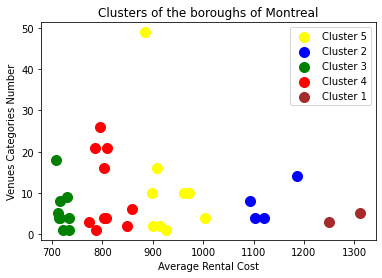

In [24]:
plt.scatter(X.loc[X['Cluster']==0].Average_rental_cost,X.loc[X['Cluster']==0].Venue_Category_Count, s=100, c='yellow', label='Cluster 5')
plt.scatter(X.loc[X['Cluster']==1].Average_rental_cost,X.loc[X['Cluster']==1].Venue_Category_Count, s=100, c='blue', label='Cluster 2')
plt.scatter(X.loc[X['Cluster']==2].Average_rental_cost,X.loc[X['Cluster']==2].Venue_Category_Count, s=100, c='green', label='Cluster 3')
plt.scatter(X.loc[X['Cluster']==3].Average_rental_cost,X.loc[X['Cluster']==3].Venue_Category_Count, s=100, c='red', label='Cluster 4')
plt.scatter(X.loc[X['Cluster']==4].Average_rental_cost,X.loc[X['Cluster']==4].Venue_Category_Count, s=100, c='brown', label='Cluster 1')
plt.legend()
plt.title('Clusters of the boroughs of Montreal')
plt.xlabel('Average Rental Cost')
plt.ylabel('Venues Categories Number')

Extracting minimum and maximum Average_Rental_Cost and Venues_Categories for each cluster

In [25]:
#Average_rental_cost range for cluster 1
X.loc[X['Cluster']==0].Average_rental_cost.min()
X.loc[X['Cluster']==0].Average_rental_cost.max()

#Average_rental_cost range for cluster 2
X.loc[X['Cluster']==1].Average_rental_cost.min()
X.loc[X['Cluster']==1].Average_rental_cost.max()

#Average_rental_cost range for cluster 3
X.loc[X['Cluster']==2].Average_rental_cost.min()
X.loc[X['Cluster']==2].Average_rental_cost.max()

#Average_rental_cost range for cluster 4
X.loc[X['Cluster']==3].Average_rental_cost.min()
X.loc[X['Cluster']==3].Average_rental_cost.max()

#Average_rental_cost range for cluster 5
X.loc[X['Cluster']==4].Average_rental_cost.min()
X.loc[X['Cluster']==4].Average_rental_cost.max()

#Venue_Category_Count range for cluster 1
X.loc[X['Cluster']==0].Venue_Category_Count.min()
X.loc[X['Cluster']==0].Venue_Category_Count.max()

#Venue_Category_Count range for cluster 2
X.loc[X['Cluster']==1].Venue_Category_Count.min()
X.loc[X['Cluster']==1].Venue_Category_Count.max()

#Venue_Category_Count range for cluster 3
X.loc[X['Cluster']==2].Venue_Category_Count.min()
X.loc[X['Cluster']==2].Venue_Category_Count.max()

#Venue_Category_Count range for cluster 4
X.loc[X['Cluster']==3].Venue_Category_Count.min()
X.loc[X['Cluster']==3].Venue_Category_Count.max()

#Venue_Category_Count range for cluster 5
X.loc[X['Cluster']==4].Venue_Category_Count.min()
X.loc[X['Cluster']==4].Venue_Category_Count.max()





print('Venue_Category_Count range for cluster 1 : {} - {}, \n \
      Venue_Category_Count range for cluster 2 : {} - {}, \n \
      Venue_Category_Count range for cluster 3 : {} - {}, \n \
      Venue_Category_Count range for cluster 4 : {} - {}, \n \
      Venue_Category_Count range for cluster 5 : {} - {}'.format(X.loc[X['Cluster']==4].Venue_Category_Count.min(), \
                                                             X.loc[X['Cluster']==4].Venue_Category_Count.max(), \
                                                             X.loc[X['Cluster']==1].Venue_Category_Count.min(), \
                                                             X.loc[X['Cluster']==1].Venue_Category_Count.max(), \
                                                             X.loc[X['Cluster']==2].Venue_Category_Count.min(), \
                                                             X.loc[X['Cluster']==2].Venue_Category_Count.max(), \
                                                             X.loc[X['Cluster']==3].Venue_Category_Count.min(), \
                                                             X.loc[X['Cluster']==3].Venue_Category_Count.max(), \
                                                             X.loc[X['Cluster']==0].Venue_Category_Count.min(), \
                                                             X.loc[X['Cluster']==0].Venue_Category_Count.max()))


print('Average_rental_cost range for cluster 1 : {} $ - {} $, \n \
      Average_rental_cost range for cluster 2 : {} $ - {} $, \n \
      Average_rental_cost range for cluster 3 : {} $ - {} $, \n \
      Average_rental_cost range for cluster 4 : {} $ - {} $, \n \
      Average_rental_cost range for cluster 5 : {} $ - {} $'.format(X.loc[X['Cluster']==4].Average_rental_cost.min(), \
                                                             X.loc[X['Cluster']==4].Average_rental_cost.max(), \
                                                             X.loc[X['Cluster']==1].Average_rental_cost.min(), \
                                                             X.loc[X['Cluster']==1].Average_rental_cost.max(), \
                                                             X.loc[X['Cluster']==2].Average_rental_cost.min(), \
                                                             X.loc[X['Cluster']==2].Average_rental_cost.max(), \
                                                             X.loc[X['Cluster']==3].Average_rental_cost.min(), \
                                                             X.loc[X['Cluster']==3].Average_rental_cost.max(), \
                                                             X.loc[X['Cluster']==0].Average_rental_cost.min(), \
                                                             X.loc[X['Cluster']==0].Average_rental_cost.max()))



Venue_Category_Count range for cluster 1 : 3.0 - 5.0, 
       Venue_Category_Count range for cluster 2 : 4.0 - 14.0, 
       Venue_Category_Count range for cluster 3 : 1.0 - 18.0, 
       Venue_Category_Count range for cluster 4 : 1.0 - 26.0, 
       Venue_Category_Count range for cluster 5 : 1.0 - 49.0
Average_rental_cost range for cluster 1 : 1249 $ - 1312 $, 
       Average_rental_cost range for cluster 2 : 1093 $ - 1186 $, 
       Average_rental_cost range for cluster 3 : 708 $ - 734 $, 
       Average_rental_cost range for cluster 4 : 774 $ - 859 $, 
       Average_rental_cost range for cluster 5 : 885 $ - 1003 $


From the graphic, we see that all the boroughs of Montreal city can be grouped into 5 different clusters, these clusters can be defined as follow:

| Cluster | Venues_Categories| Average_Rental_Cost|
|---------|-------------------------|---------------------------|
| 1       |       1 - 17                  | 708 $-734 $             |
| 2       |       1 - 23                  | 774 $-859 $             |
| 3       |       1 - 51                  | 885 $-1003 $            |
| 4       |       4 - 15                  | 1093 $-1186 $           |
| 5       |       4 - 6                   | 1249 $-1312 $           |

In [26]:
#Adding the Cluster data to df_mtl
df_mtl['Cluster']=X['Cluster']
df_mtl.reset_index(inplace=True)
df_mtl=df_mtl.rename({'Index':'Borough'})
df_mtl

,Borough,Average_rental_cost,latitude,longitude,Total_Venues,Venue_Category_Count,Cluster
0,Ahuntsic-Cartierville,715,45.541892,-73.680319,8,8.0,NaN
1,Anjou,774,45.604898,-73.546672,3,3.0,NaN
2,Côte-des-Neiges-Notre-Dame-de-Grâce,795,45.483609,-73.626970,32,26.0,NaN
3,Lachine,715,45.448676,-73.711204,4,4.0,NaN
4,LaSalle,786,45.432514,-73.629267,29,21.0,NaN


Let's have a closer look and see which borough belong to each of the clusters :

In [58]:
df_mtl['Cluster']=X['Cluster']

In [60]:
df_mtl

,Borough,Average_rental_cost,latitude,longitude,Total_Venues,Venue_Category_Count,Cluster
0,Ahuntsic-Cartierville,715,45.541892,-73.680319,8,8.0,2
1,Anjou,774,45.604898,-73.546672,3,3.0,3
2,Côte-des-Neiges-Notre-Dame-de-Grâce,795,45.483609,-73.626970,32,26.0,3
3,Lachine,715,45.448676,-73.711204,4,4.0,2
4,LaSalle,786,45.432514,-73.629267,29,21.0,3
5,Le Plateau-Mont-Royal,885,45.521836,-73.582173,93,49.0,0
6,Le Sud-Ouest,729,45.467991,-73.588561,10,9.0,2
7,L'Île-Bizard-Sainte-Geneviève,788,45.495042,-73.903445,1,1.0,3
8,Mercier-Hochelaga-Maisonneuve,721,45.574099,-73.525838,1,1.0,2
9,Montréal-Nord,714,45.593899,-73.637606,4,4.0,2


In [27]:
"""
#df_unique_categories_per_borough=pd.DataFrame(df_mtl_global.groupby('Borough').Venue_Category.unique())
len(df_mtl_venues_global.loc[df_mtl_venues_global['Borough']=='Le Plateau-Mont-Royal', 'Venue_Category'].unique())
"""

"\n#df_unique_categories_per_borough=pd.DataFrame(df_mtl_global.groupby('Borough').Venue_Category.unique())\nlen(df_mtl_venues_global.loc[df_mtl_venues_global['Borough']=='Le Plateau-Mont-Royal', 'Venue_Category'].unique())\n"

In [28]:
"""
#Getting the unique Venue_Category for each borough
df_unique_categories_per_borough=df_mtl_global.groupby('Borough').Venue_Category.unique()

#Counting the unique Venue_Categories for each borough
count_categories_per_borough=[]#initialize the list

for borough in df_unique_categories_per_borough: #looping through the df_unique_categories_per_borough to complete the list of Venue_Category count
    count_categories_per_borough.append(len(df_unique_categories_per_borough[borough]))


df_unique_categories_per_borough=
#merge the count_categories_per_borough list to the Analysing DataFrame
"""

"\n#Getting the unique Venue_Category for each borough\ndf_unique_categories_per_borough=df_mtl_global.groupby('Borough').Venue_Category.unique()\n\n#Counting the unique Venue_Categories for each borough\ncount_categories_per_borough=[]#initialize the list\n\nfor borough in df_unique_categories_per_borough: #looping through the df_unique_categories_per_borough to complete the list of Venue_Category count\n    count_categories_per_borough.append(len(df_unique_categories_per_borough[borough]))\n\n\ndf_unique_categories_per_borough=\n#merge the count_categories_per_borough list to the Analysing DataFrame\n"

In [29]:
"""df_mtl = pd.merge(df_mtl, df_json, left_on='Borough', right_on='Name')
#df_left = pd.merge(df_mtl, df_json, on='Borough', how='left')
df_mtl"""

"df_mtl = pd.merge(df_mtl, df_json, left_on='Borough', right_on='Name')\n#df_left = pd.merge(df_mtl, df_json, on='Borough', how='left')\ndf_mtl"

In [30]:
"""
#Name of boroughs in the JSON file
import json
# denominations in the json file

boroughs_geo=r'limadmin.json'
# open the json file - json.load() methods returns a python dictionary
with open(boroughs_geo) as boroughs_file:
    boroughs_json = json.load(boroughs_file)
    
# we loop through the dictionary to obtain the name of the boroughs in the json file
denominations_json = []
codeID_json = []
for index in range(len(boroughs_json['features'])):
    denominations_json.append(boroughs_json['features'][index]['properties']['NOM'])
    codeID_json.append(boroughs_json['features'][index]['properties']['CODEID'])

df_json1=pd.DataFrame(denominations_json, columns=['Name'])
df_json2=pd.DataFrame(codeID_json, columns=['codeID'])

df_json=pd.DataFrame(data=[df_json1['Name'], df_json2['codeID']])
df_json=df_json.T
df_json"""

"\n#Name of boroughs in the JSON file\nimport json\n# denominations in the json file\n\nboroughs_geo=r'limadmin.json'\n# open the json file - json.load() methods returns a python dictionary\nwith open(boroughs_geo) as boroughs_file:\n    boroughs_json = json.load(boroughs_file)\n    \n# we loop through the dictionary to obtain the name of the boroughs in the json file\ndenominations_json = []\ncodeID_json = []\nfor index in range(len(boroughs_json['features'])):\n    denominations_json.append(boroughs_json['features'][index]['properties']['NOM'])\n    codeID_json.append(boroughs_json['features'][index]['properties']['CODEID'])\n\ndf_json1=pd.DataFrame(denominations_json, columns=['Name'])\ndf_json2=pd.DataFrame(codeID_json, columns=['codeID'])\n\ndf_json=pd.DataFrame(data=[df_json1['Name'], df_json2['codeID']])\ndf_json=df_json.T\ndf_json"

In [42]:
#Name of boroughs in the JSON file
import json
# denominations in the json file

boroughs_geo=r'limadmin.json'
# open the json file - json.load() methods returns a python dictionary
with open(boroughs_geo) as boroughs_file:
    boroughs_json = json.load(boroughs_file)
    
# we loop through the dictionary to obtain the name of the boroughs in the json file
denominations_json = []
codeID_json = []
for index in range(len(boroughs_json['features'])):
    denominations_json.append(boroughs_json['features'][index]['properties']['NOM'])
    codeID_json.append(boroughs_json['features'][index]['properties']['CODEID'])

df_json1=pd.DataFrame(denominations_json, columns=['Name'])
df_json2=pd.DataFrame(codeID_json, columns=['codeID'])

df_json=pd.DataFrame(data=[df_json1['Name'], df_json2['codeID']])
df_json=df_json.T
df_json.head()

,Name,codeID
0,Outremont,11
1,LaSalle,22
2,Mont-Royal,62
3,Ville-Marie,9
4,Le Plateau-Mont-Royal,5


In [68]:
df_mtl

,Borough,Average_rental_cost,latitude,longitude,Total_Venues,Venue_Category_Count,Cluster
0,Ahuntsic-Cartierville,715,45.541892,-73.680319,8,8.0,2
1,Anjou,774,45.604898,-73.546672,3,3.0,3
2,Côte-des-Neiges-Notre-Dame-de-Grâce,795,45.483609,-73.626970,32,26.0,3
3,Lachine,715,45.448676,-73.711204,4,4.0,2
4,LaSalle,786,45.432514,-73.629267,29,21.0,3
5,Le Plateau-Mont-Royal,885,45.521836,-73.582173,93,49.0,0
6,Le Sud-Ouest,729,45.467991,-73.588561,10,9.0,2
7,L'Île-Bizard-Sainte-Geneviève,788,45.495042,-73.903445,1,1.0,3
8,Mercier-Hochelaga-Maisonneuve,721,45.574099,-73.525838,1,1.0,2
9,Montréal-Nord,714,45.593899,-73.637606,4,4.0,2


In [45]:
df=pd.merge(df_mtl,df_json, left_on='Borough', right_on='Name')
df

,Borough,Average_rental_cost,latitude,longitude,Total_Venues,Venue_Category_Count,Cluster,Name,codeID
0,Ahuntsic-Cartierville,715,45.541892,-73.680319,8,8.0,NaN,Ahuntsic-Cartierville,4
1,Anjou,774,45.604898,-73.546672,3,3.0,NaN,Anjou,7
2,Côte-des-Neiges-Notre-Dame-de-Grâce,795,45.483609,-73.626970,32,26.0,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,61
3,Lachine,715,45.448676,-73.711204,4,4.0,NaN,Lachine,28
4,LaSalle,786,45.432514,-73.629267,29,21.0,NaN,LaSalle,22
5,Le Plateau-Mont-Royal,885,45.521836,-73.582173,93,49.0,NaN,Le Plateau-Mont-Royal,5
6,Le Sud-Ouest,729,45.467991,-73.588561,10,9.0,NaN,Le Sud-Ouest,63
7,L'Île-Bizard-Sainte-Geneviève,788,45.495042,-73.903445,1,1.0,NaN,L'Île-Bizard-Sainte-Geneviève,39
8,Mercier-Hochelaga-Maisonneuve,721,45.574099,-73.525838,1,1.0,NaN,Mercier-Hochelaga-Maisonneuve,10
9,Montréal-Nord,714,45.593899,-73.637606,4,4.0,NaN,Montréal-Nord,2


In [67]:
df_mtl.columns

Index(['Borough', 'Average_rental_cost', 'latitude', 'longitude',
       'Total_Venues', 'Venue_Category_Count', 'Cluster'],
      dtype='object')

In [71]:
!wget --quiet http://donnees.ville.montreal.qc.ca/dataset/00bd85eb-23aa-4669-8f1b-ba9a000e3dd8/resource/e9b0f927-8f75-458c-8fda-b5da65cc8b73/download/limadmin.json -O limadmin.json

mtl_geo = json.load(open("limadmin.json",'r'))
folium.Choropleth(
        geo_data=mtl_geo,
        data=df,
        columns=['Borough','Average_rental_cost'],
        key_on='features.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='Average rental cost'
).add_to(mtl_map)
folium.LayerControl().add_to(mtl_map)

mtl_map

AttributeError: ignored

In [ ]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd


values = df_mtl['Cluster'].tolist()
fips = df_mtl['FIPS'].tolist()

binning_endpoints = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
            "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Florida'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=binning_endpoints,
    round_legend_values=True, plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)', legend_title='Florida Population',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)

In [49]:
geo=json.load(open("limadmin.json",'r'))
geo['features'][1]['properties']

{'ABREV': 'LS',
 'AIRE': 25197267.8224814,
 'CODEID': '22',
 'CODEMAMROT': 'REM17',
 'MUNID': 66023,
 'NOM': 'LaSalle',
 'NUM': 18,
 'PERIM': 25259.8494666826,
 'TYPE': 'Arrondissement'}

In [96]:
geo=json.load(open("limadmin.json",'r'))
if "features" in geo:
  if "properties" in geo['features'][32]:
    if "CODEID" in geo['features'][32]['properties']:

      print('1')
    else:
      print('0')

1


In [82]:
geo['features'][0]['properties'].keys()

dict_keys(['NOM', 'TYPE', 'CODEID', 'ABREV', 'NUM', 'CODEMAMROT', 'AIRE', 'MUNID', 'PERIM'])

In [53]:
print

0.11.0+19.g46f820e


In [39]:
import plotly.express as px
import plotly.io as pio

In [40]:
fig=px.choropleth(df_mtl, locations='Borough', geojson=mtl_geo, color='Cluster', scope='north america')
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

TypeError: ignored

In [ ]:
import webbrowser
print(webbrowser._browsers)

In [ ]:
help(px.choropleth)

In [38]:
pip install -U plotly

     |████████████████████████████████| 12.9MB 325kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
